#### https://online.stat.psu.edu/stat505/lesson/11

In [1]:
from IPython.display import Image

A lot of features -> reduce number of features

Suppose we have a random vector **X** which is n x p:
$$
X = \begin{bmatrix} X_{1} & X_{2} & ... & X_{p} \end{bmatrix}
$$


We can decompose the cov mat of **X** and get evalues and evectors. For example, the first evalue if $\lambda_1$ and the corresponding evector is p x 1:
$$
e_1 = \begin{bmatrix} e_{11} & e_{12} & ... & e_{1p} \end{bmatrix}^T
$$

We can construct new variables according to these eigenvectors:

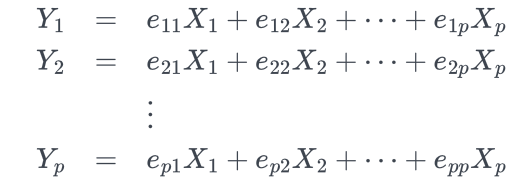

In [2]:
Image("pca_101.png", width=300, height=300)

Or in the matrix form for each variable:
$$
Y_i = X e_i
$$

Or in the matrix form for all variables:
$$
Y = X \begin{bmatrix} e_{1} & e_{2} & ... & e_{p} \end{bmatrix}
$$

And
$$
Y = \begin{bmatrix} Y_{1} & Y_{2} & ... & Y_{p} \end{bmatrix}
$$

#### Each $Y_i$ is a linear combination of x-variables, and thus $Y_i$ is univariate normal.

$$
E[Y_i] = \mu_X e_i
$$

$$
var(Y_i) = e_i^T \Sigma_X e_i
$$

$$
cov(Y_i, Y_j) = e_i^T \Sigma_X e_j
$$

#### PCA1: First Principal Component, $Y_1$

The first principal component is the LC of x-variables that has maximum variance. It accounts for as much variation in the data as possible. Note that we want eigenvectors to be orthonormal

$$
var(Y_1) = e_1^T \Sigma_X e_1
$$
subject to the constraint that
$$
e_1^T e_1 = 1
$$

#### PCA2: Second Principal Component, $Y_2$

The second principal component is the LC of x-variables that accounts for as much of the remaining variation as possible. We also want that the two components are uncorrelated.

$$
var(Y_2) = e_2^T \Sigma_X e_2
$$
subject to the constraint that 
$$
e_2^T e_2 = 1
$$
as well as
$$
cov(Y_1, Y_2) = e_1^T \Sigma_X e_2 = 0
$$

#### Spectral Decomposition Theorem 

Y is n x p
$$
Y = X \begin{bmatrix} e_{1} & e_{2} & ... & e_{p} \end{bmatrix}
$$

But we can only keep the first k columns

Now Y is n x k, and k is much smaller than p
$$
Y = X \begin{bmatrix} e_{1} & e_{2} & ... & e_{k} \end{bmatrix}
$$

Why? Because the theorem tells us that we can decompose $\Sigma_X$ into the sum of the p eigenvalues multiplied some functions of eigenvectors:
$$
\Sigma_X = \sum_{i=1}^p \lambda_i e_i e_i^T \approx \sum_{i=1}^k \lambda_i e_i e_i^T
$$
Notice that the first eigenvalue is the biggest, representing the largest portion of the variation that x-variables bring us

From another perspective, the total variation is $trace(\Sigma) = \lambda_1 + \lambda_2 + ... + \lambda_p$. If we find proper k, we can keep most of the total variation.

#### Two conflicting desires

(1) simplest possible interpretations, want k to be as small as possible <br>
(2) avoid loss of information, i.e. want $\frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^p \lambda_i} \approx 1$

#### A toy example to explain the intuition

<AxesSubplot:xlabel='x1', ylabel='x2'>

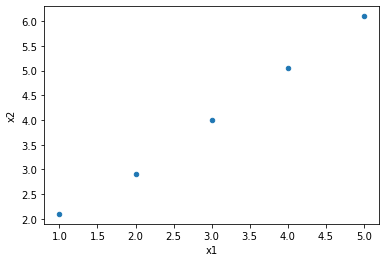

In [3]:
import pandas as pd
df =pd.DataFrame({
    "x1":[1,2,3,4,5],
    "x2":[2.1,2.9,4,5.05,6.1]
})
df.plot.scatter('x1','x2')

$x_1$ and $x_2$ look like two variables, but since they are highly correlated, we can put them together and form only one variable $x_1+x_2$

In [4]:
df['y1'] = df['x1'] + df['x2']

In [5]:
df['y1']

0     3.10
1     4.90
2     7.00
3     9.05
4    11.10
Name: y1, dtype: float64

We managed to reduce the number of dimensions from 2 to 1, and also keep almost all of the information from the two features.

In [6]:
import numpy as np

In [7]:
np.linalg.eig(df[['x1','x2']].cov())

(array([3.16879009e-03, 5.07883121e+00]),
 array([[-0.71279574, -0.70137168],
        [ 0.70137168, -0.71279574]]))

In [8]:
lambda1 = 5.07883121e+00
lambda2 = 3.16879009e-03

In [9]:
lambda1 / (lambda1 + lambda2)

0.9993764679083148

Notice that $\lambda_1$ gets 99.9% variation if we form in this way:
$$
Y_1 = -0.70137168 X_1 - 0.71279574 X_2
$$

In [10]:
df['y1'] = -0.70137168 * df['x1'] - 0.71279574 * df['x2']

In [11]:
df['y1']

0   -2.198243
1   -3.469851
2   -4.955298
3   -6.405105
4   -7.854912
Name: y1, dtype: float64

#### Actual Procedure

<ol>
    <li>Raw data: almost never directly deal with raw data</li>
    <li>Translation: use $x - \mu_x$ instead; Translation only makes it centered around 0, but doesn't affect variances, and thus not affect the interpretations</li>
    <li>Standardization: Mostly, you should do $\frac{x-\mu_x}{\sigma_x}$ first. Because otherwise PCA tends to give more emphasis to those variables with higher variances. One exception is, you do want to give more weight to variables with higher variances. For examples, you analyze counts of different species across different sample sites, and you tend to find that more common species will also show higher variances of counts. If you do standardization in this case, rare specifies may give exceedingly high contributions.</li>
</ol>

#### Example: Places Rates Almanac data which rates 329 communities according to 9 criteria: climate, housing, health care, ...

#### Let's deal with raw data first, for illustration purpose

In [50]:
df = pd.read_csv("places.txt", delim_whitespace=True, header=None, index_col=-1)

In [51]:
df.columns = ['climate', 'housing', 'health', 'crime', 'transportation', 'education', 'arts', 'recreation', 'economics']

Note that the data are strongly skewed to the right, so we do log transformation first

In [14]:
import seaborn as sns

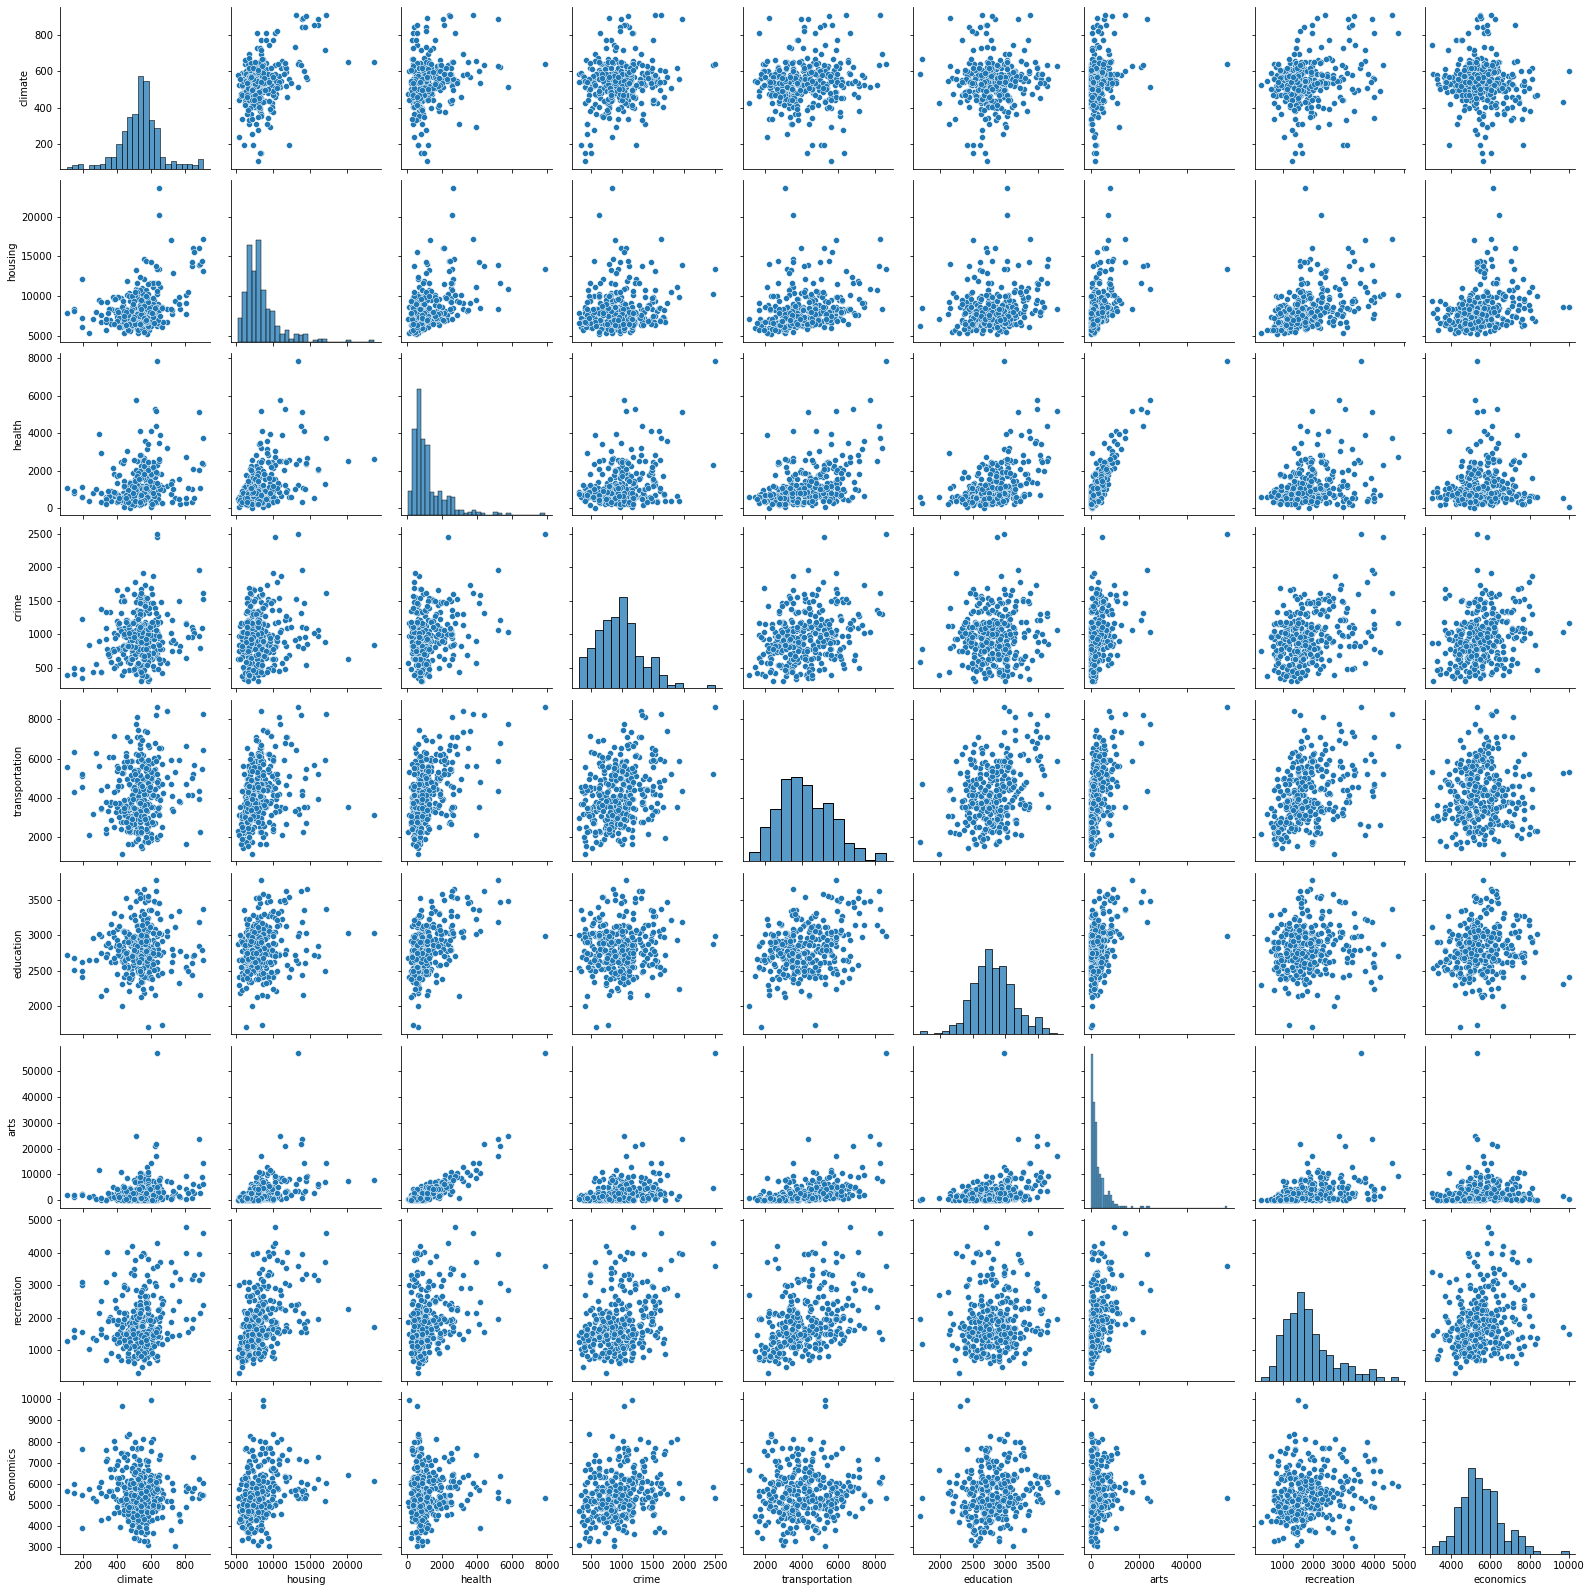

In [15]:
sns.pairplot(df)

In [52]:
df = df.apply(np.log10)

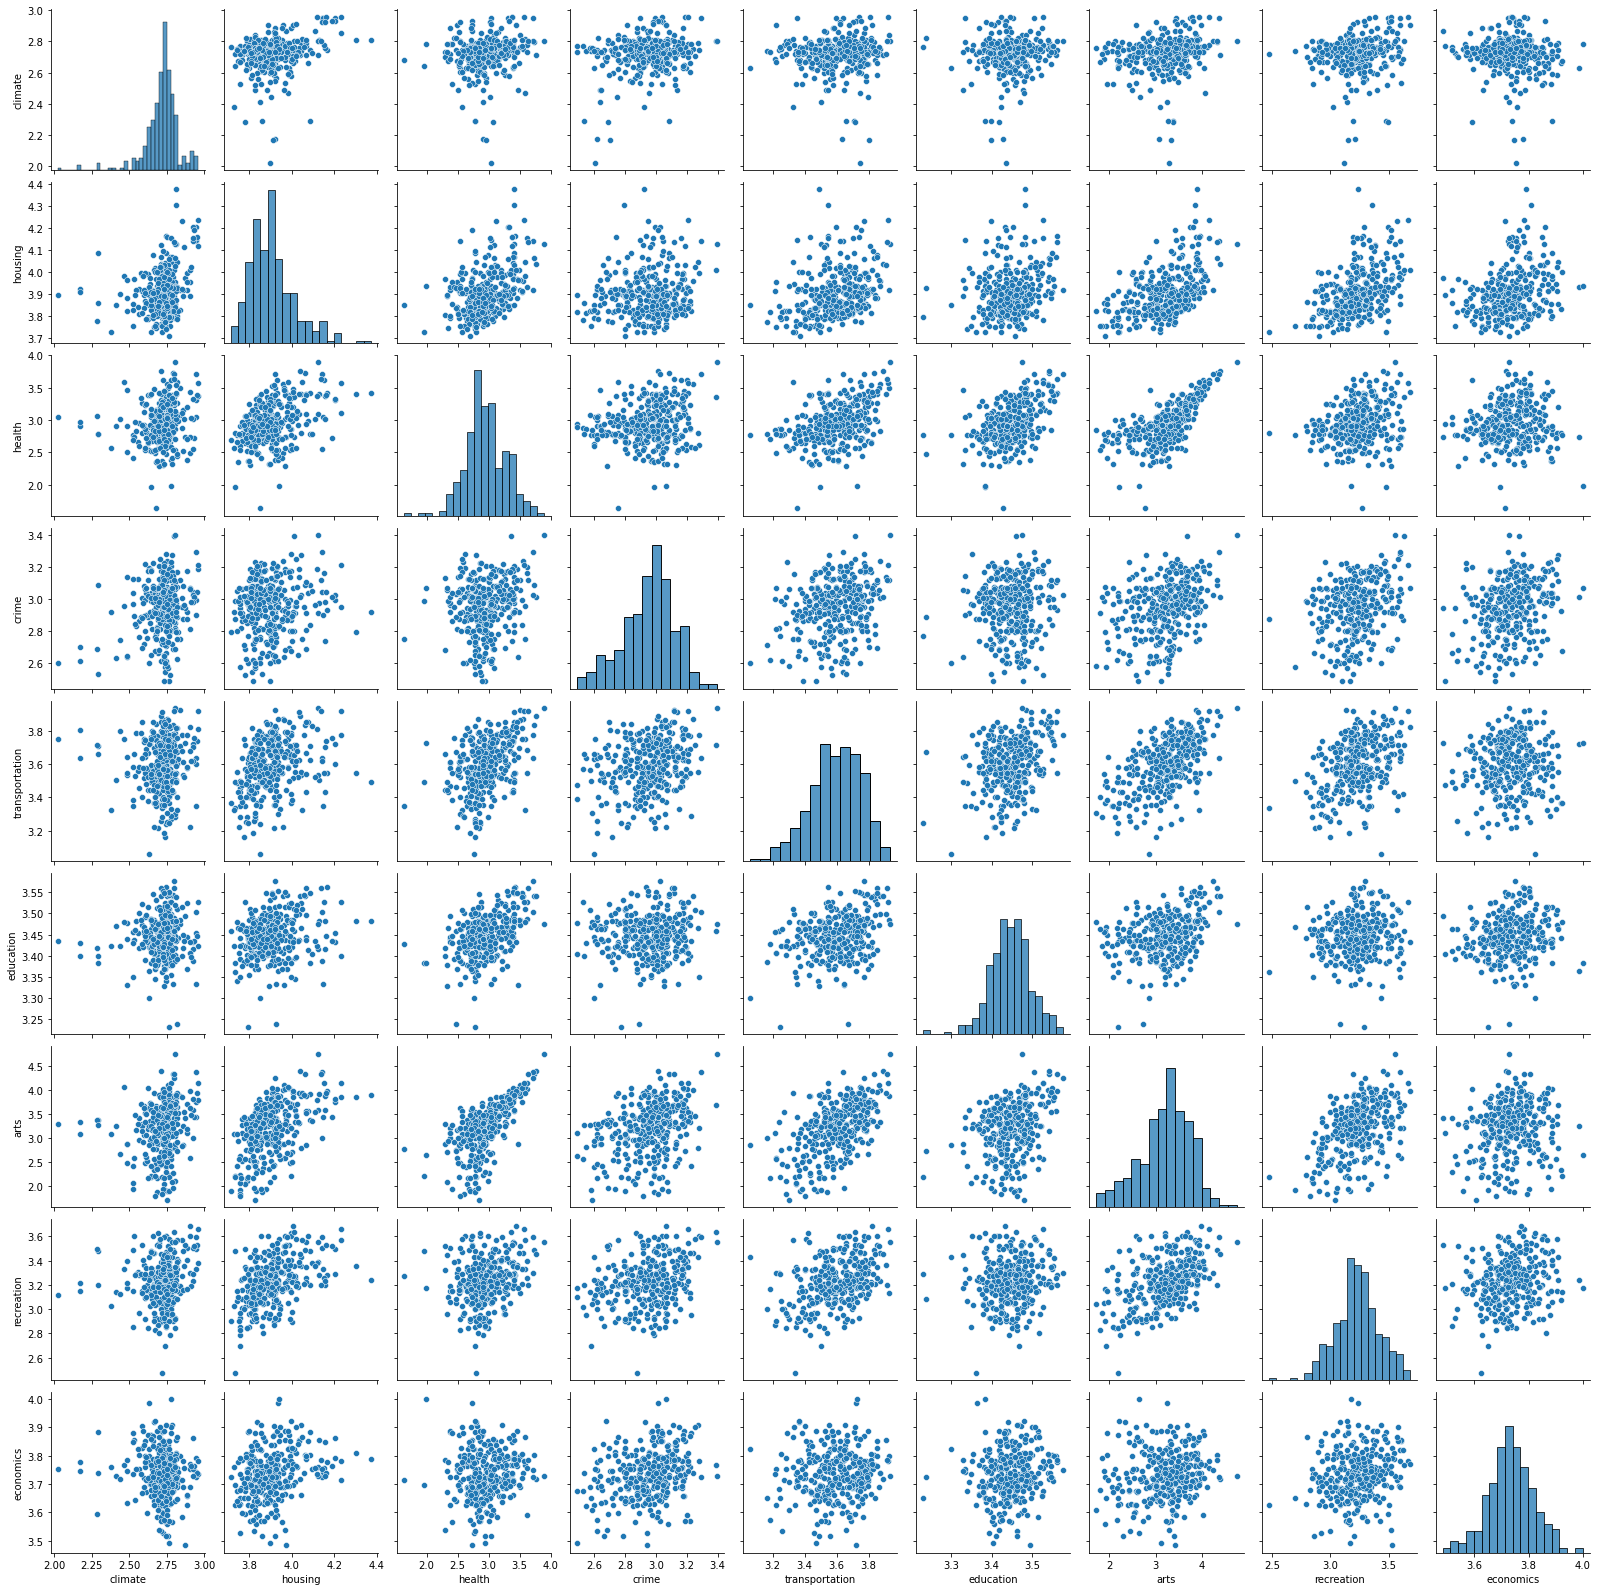

In [17]:
sns.pairplot(df)

In [18]:
df.describe()

,climate,housing,health,crime,transportation,education,arts,recreation,economics
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,2.718494,3.907491,2.955487,2.951627,3.597202,3.446607,3.206209,3.226567,3.734182
std,0.113544,0.105433,0.320512,0.169147,0.157572,0.050199,0.545136,0.187904,0.084478
min,2.021189,3.712566,1.633468,2.488551,3.058805,3.230704,1.716003,2.477121,3.483587
25%,2.681241,3.829947,2.765669,2.849419,3.497068,3.418135,2.890980,3.119256,3.685025
50%,2.733999,3.896361,2.920645,2.976350,3.610660,3.446226,3.272074,3.222716,3.731105
75%,2.772322,3.954966,3.159868,3.062958,3.716421,3.478855,3.584783,3.337659,3.786254
max,2.959041,4.373647,3.894870,3.397592,3.935759,3.577607,4.753928,3.681241,3.999131


In [19]:
df.cov()

,climate,housing,health,crime,transportation,education,arts,recreation,economics
climate,0.012892,0.003268,0.005479,0.004374,0.000386,0.000442,0.010689,0.002573,-0.000966
housing,0.003268,0.011116,0.014596,0.002483,0.005279,0.001070,0.029226,0.009127,0.002646
health,0.005479,0.014596,0.102728,0.009955,0.021153,0.007478,0.118484,0.015299,0.001463
crime,0.004374,0.002483,0.009955,0.028611,0.007299,0.000471,0.031947,0.009285,0.003946
transportation,0.000386,0.005279,0.021153,0.007299,0.024829,0.002462,0.047041,0.011567,0.000834
education,0.000442,0.001070,0.007478,0.000471,0.002462,0.002520,0.009520,0.000877,0.000546
arts,0.010689,0.029226,0.118484,0.031947,0.047041,0.009520,0.297173,0.050860,0.006206
recreation,0.002573,0.009127,0.015299,0.009285,0.011567,0.000877,0.050860,0.035308,0.002792
economics,-0.000966,0.002646,0.001463,0.003946,0.000834,0.000546,0.006206,0.002792,0.007137


In [20]:
evalues, evectors = np.linalg.eig(df.cov())
indexes = np.argsort(evalues)
indexes = np.flip(indexes)
evalues = evalues[indexes]
evectors = evectors[:, indexes]

**The first analysis tool**

In [21]:
result = pd.DataFrame({"eigenvalue":evalues})
result['proportion'] = result / result.sum()
result['cumulative'] = result['proportion'].cumsum()
result.index = list(range(1, result.shape[0]+1))

In [22]:
result

,eigenvalue,proportion,cumulative
1,0.377462,0.722674,0.722674
2,0.051052,0.097742,0.820417
3,0.027920,0.053454,0.873870
4,0.022967,0.043972,0.917842
5,0.016771,0.032110,0.949952
6,0.011953,0.022884,0.972836
7,0.008457,0.016191,0.989027
8,0.003934,0.007532,0.996559
9,0.001797,0.003441,1.000000


The first principal component explain 72%, and the first 3 components combined can explain 87%

#### the second analysis tool

<AxesSubplot:>

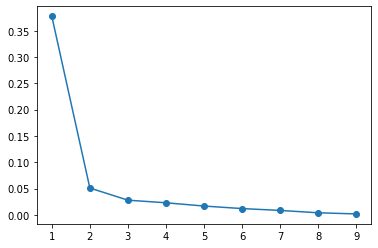

In [23]:
result['eigenvalue'].plot(marker='o')

As you see, the first 2 eigenvalues are obviously larger

#### OK let's make 3 variables out of 9

In [24]:
evectors[:,0]

array([0.03507288, 0.09335159, 0.40776448, 0.10044536, 0.15009714,
       0.03215319, 0.87434057, 0.15899622, 0.01949418])

$$
Y_1 = 0.0351 * climate + 0.0933 * housing + ... + 0.0195 * economics
$$

In [25]:
df_new = df @ evectors[:, :3]

In [26]:
df_new.columns = ['Y1', 'Y2', 'Y3']

In [27]:
df_new.var(ddof=1)

Y1    0.377462
Y2    0.051052
Y3    0.027920
dtype: float64

In [28]:
evalues[:3]

array([0.37746236, 0.05105221, 0.02791958])

#### Interpretation of the Principal Components & the third analysis tool

Let's compute the correlations between the original data and principal components

In [29]:
pd.concat([df_new,df], axis=1).corr()

,Y1,Y2,Y3,climate,housing,health,crime,transportation,education,arts,recreation,economics
Y1,1.000000e+00,-3.096678e-16,-2.041790e-15,0.189776,0.543978,0.781631,0.364840,0.585236,0.393516,0.985400,0.519862,0.141774
Y2,-3.096678e-16,1.000000e+00,1.156970e-15,-0.017667,-0.019781,0.605229,-0.294443,-0.084890,0.272709,-0.125921,-0.401614,-0.150050
Y3,-2.041790e-15,1.156970e-15,1.000000e+00,-0.207311,-0.204202,-0.143916,-0.585486,-0.234244,-0.027110,0.111352,-0.518984,-0.239039
climate,1.897764e-01,-1.766713e-02,-2.073107e-01,1.000000,0.272964,0.150561,0.227751,0.021559,0.077458,0.172683,0.120610,-0.100727
housing,5.439783e-01,-1.978148e-02,-2.042024e-01,0.272964,1.000000,0.431935,0.139234,0.317732,0.202088,0.508501,0.460696,0.297058
health,7.816315e-01,6.052287e-01,-1.439164e-01,0.150561,0.431935,1.000000,0.183625,0.418850,0.464764,0.678129,0.254036,0.054047
crime,3.648400e-01,-2.944431e-01,-5.854860e-01,0.227751,0.139234,0.183625,1.000000,0.273852,0.055508,0.346462,0.292124,0.276182
transportation,5.852356e-01,-8.489042e-02,-2.342438e-01,0.021559,0.317732,0.418850,0.273852,1.000000,0.311237,0.547634,0.390684,0.062680
education,3.935162e-01,2.727092e-01,-2.711012e-02,0.077458,0.202088,0.464764,0.055508,0.311237,1.000000,0.347899,0.093001,0.128858
arts,9.854003e-01,-1.259213e-01,1.113525e-01,0.172683,0.508501,0.678129,0.346462,0.547634,0.347899,1.000000,0.496519,0.134761


In [30]:
pd.concat([df_new,df], axis=1).corr().iloc[3:, :3]

,Y1,Y2,Y3
climate,0.189776,-0.017667,-0.207311
housing,0.543978,-0.019781,-0.204202
health,0.781631,0.605229,-0.143916
crime,0.364840,-0.294443,-0.585486
transportation,0.585236,-0.084890,-0.234244
education,0.393516,0.272709,-0.027110
arts,0.985400,-0.125921,0.111352
recreation,0.519862,-0.401614,-0.518984
economics,0.141774,-0.150050,-0.239039


Arbitrarily, we say a correlation above 0.5 is deemed important

The first principal component is strongly correlated with five of the original variables. The first principal component increases with increasing Arts, Health, Transportation, Housing and Recreation scores. This suggests that these five criteria vary together. If one increases, then the remaining ones tend to increase as well. This component can be viewed as a measure of the quality of Arts, Health, Transportation, and Recreation, and the lack of quality in Housing (recall that high values for Housing are bad). 

The second principal component increases with only one of the values, decreasing Health. This component can be viewed as a measure of how unhealthy the location is in terms of available health care including doctors, hospitals, etc.

The third principal component increases with increasing Crime and Recreation. This suggests that places with high crime also tend to have better recreation facilities.

#### Fourth analysis tool

<AxesSubplot:xlabel='Y1', ylabel='Y2'>

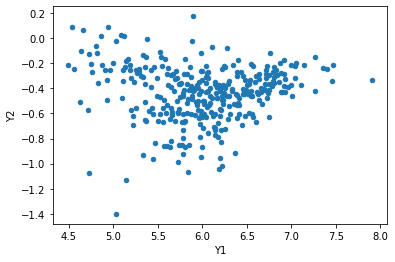

In [31]:
df_new.plot.scatter("Y1","Y2")

#### By default, we should do translation. And mostly, we need to do standardization.

In [32]:
df = pd.read_csv("places.txt", delim_whitespace=True, header=None, index_col=-1)
df.columns = ['climate', 'housing', 'health', 'crime', 'transportation', 'education', 'arts', 'recreation', 'economics']
df = df.apply(np.log10)

In [33]:
mu = df.mean()
std = df.std()

In [34]:
mu

climate           2.718494
housing           3.907491
health            2.955487
crime             2.951627
transportation    3.597202
education         3.446607
arts              3.206209
recreation        3.226567
economics         3.734182
dtype: float64

In [35]:
std

climate           0.113544
housing           0.105433
health            0.320512
crime             0.169147
transportation    0.157572
education         0.050199
arts              0.545136
recreation        0.187904
economics         0.084478
dtype: float64

In [36]:
df2 = (df - mu)/std

In [37]:
df2.describe()

,climate,housing,health,crime,transportation,education,arts,recreation,economics
count,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02
mean,1.691420e-14,1.688931e-14,1.990303e-15,2.368926e-15,3.244281e-15,9.478403e-15,3.243606e-15,1.415821e-14,1.025792e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.141248e+00,-1.848808e+00,-4.124708e+00,-2.737716e+00,-3.416831e+00,-4.300895e+00,-2.733641e+00,-3.988457e+00,-2.966390e+00
25%,-3.280907e-01,-7.354849e-01,-5.922339e-01,-6.042536e-01,-6.354801e-01,-5.671593e-01,-5.782592e-01,-5.710980e-01,-5.818949e-01
50%,1.365558e-01,-1.055675e-01,-1.087060e-01,1.461622e-01,8.541178e-02,-7.572530e-03,1.208219e-01,-2.049388e-02,-3.642451e-02
75%,4.740660e-01,4.502814e-01,6.376714e-01,6.581894e-01,7.566015e-01,6.424071e-01,6.944579e-01,5.912151e-01,6.164002e-01
max,2.118529e+00,4.421346e+00,2.930883e+00,2.636555e+00,2.148592e+00,2.609597e+00,2.839142e+00,2.419717e+00,3.136300e+00


In [38]:
evalues, evectors = np.linalg.eig(df2.cov())
indexes = np.argsort(evalues)
indexes = np.flip(indexes)
evalues = evalues[indexes]
evectors = evectors[:, indexes]

In [39]:
result2 = pd.DataFrame({"eigenvalue":evalues})
result2['proportion'] = result2 / result2.sum()
result2['cumulative'] = result2['proportion'].cumsum()
result2.index = list(range(1, result2.shape[0]+1))

In [40]:
result2

,eigenvalue,proportion,cumulative
1,3.297793,0.366421,0.366421
2,1.213562,0.134840,0.501262
3,1.105530,0.122837,0.624098
4,0.907280,0.100809,0.724907
5,0.860629,0.095625,0.820533
6,0.562186,0.062465,0.882998
7,0.483821,0.053758,0.936756
8,0.318072,0.035341,0.972097
9,0.251128,0.027903,1.000000


<AxesSubplot:>

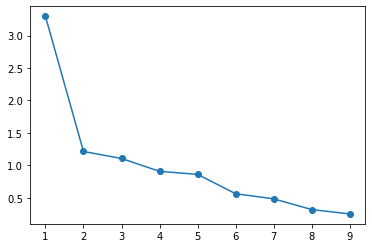

In [41]:
result2['eigenvalue'].plot(marker='o')

In [42]:
df2_new = df2 @ evectors[:, :5]
df2_new.columns = ['Y1','Y2','Y3','Y4','Y5']

In [43]:
pd.concat([df2_new,df2], axis=1).corr().iloc[5:, :5]

,Y1,Y2,Y3,Y4,Y5
climate,-0.286819,-0.075603,-0.840848,0.358916,-0.038078
housing,-0.698073,-0.153355,-0.083712,0.187210,0.537944
health,-0.744389,0.409595,0.020477,0.107179,-0.027432
crime,-0.470524,-0.522313,-0.135076,-0.040291,-0.642128
transportation,-0.680792,0.155864,0.148325,-0.409653,-0.177577
education,-0.498170,0.498323,0.253456,0.435244,-0.208495
arts,-0.860498,0.115020,-0.011593,-0.139906,-0.011068
recreation,-0.641790,-0.321609,-0.043967,-0.384833,0.283555
economics,-0.297846,-0.595373,0.533407,0.453186,0.034425


<AxesSubplot:xlabel='Y1', ylabel='Y2'>

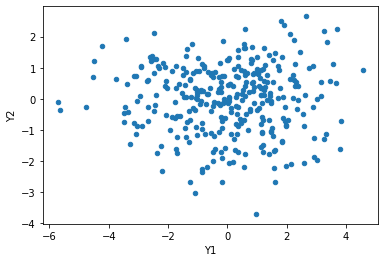

In [44]:
df2_new.plot.scatter("Y1","Y2")

<ol>
<li>
The first principal component is a measure of the quality of Health and the Arts, and to some extent Housing, Transportation, and Recreation. This component is associated with high ratings on all of these variables, especially Health and Arts. They are all positively related to PCA1 because they all have positive signs.
</li>
<li>
The second principal component is a measure of the severity of crime, the quality of the economy, and the lack of quality in education. PCA2 is associated with high ratings of Crime and Economy and low ratings of Education. Here we can see that PCA2 distinguishes cities with high levels of crime and good economies from cities with poor educational systems.
</li>
<li>
The third principal component is a measure of the quality of the climate and poorness of the economy. PCA3 is associated with high Climate ratings and low Economy ratings. The inclusion of economy within this component will add a bit of redundancy within our results. This component is primarily a measure of climate, and to a lesser extent the economy.
    </li>
<li>
The fourth principal component is a measure of the quality of education and the economy and the poorness of the transportation network and recreational opportunities. PCA4 is associated with high Education and Economy ratings and low Transportation and Recreation ratings.
    </li>
<li>
The fifth principal component is a measure of the severity of crime and the quality of housing. PCA5 is associated with high Crime ratings and low housing ratings.
    </li>
</ol>

#### Conclusion

The primary purpose of PCA analysis is descriptive & artful science

One can decide how many components to include by looking at which components can give unambiguous results, i.e., where no variable plays an important role in 2 different principle components

One nice thing is the principal components are independent of each other. It means if you regress y against them, the regression analysis would be easier to do

One of the problems with PCA is that the analysis is not clean enough. Interpretation is a big trouble. Alternatively, Factor Analysis can help obtain a cleaner interpretation of the data

#### Appendix: spectral decomposition

In [45]:
df2.cov()

,climate,housing,health,crime,transportation,education,arts,recreation,economics
climate,1.000000,0.272964,0.150561,0.227751,0.021559,0.077458,0.172683,0.120610,-0.100727
housing,0.272964,1.000000,0.431935,0.139234,0.317732,0.202088,0.508501,0.460696,0.297058
health,0.150561,0.431935,1.000000,0.183625,0.418850,0.464764,0.678129,0.254036,0.054047
crime,0.227751,0.139234,0.183625,1.000000,0.273852,0.055508,0.346462,0.292124,0.276182
transportation,0.021559,0.317732,0.418850,0.273852,1.000000,0.311237,0.547634,0.390684,0.062680
education,0.077458,0.202088,0.464764,0.055508,0.311237,1.000000,0.347899,0.093001,0.128858
arts,0.172683,0.508501,0.678129,0.346462,0.547634,0.347899,1.000000,0.496519,0.134761
recreation,0.120610,0.460696,0.254036,0.292124,0.390684,0.093001,0.496519,1.000000,0.175914
economics,-0.100727,0.297058,0.054047,0.276182,0.062680,0.128858,0.134761,0.175914,1.000000


In [46]:
sub_list = []
for i in range(9):
    e = np.matrix(evectors[:,i]).T
    sub = evalues[i] * (e @ e.T)
    sub_list.append(sub)

In [47]:
covmat1 = np.sum(sub_list[:5], axis=0)
covmat2 = np.sum(sub_list, axis=0)

In [48]:
(df2.cov() - covmat1) / df2.cov()

,climate,housing,health,crime,transportation,education,arts,recreation,economics
climate,0.074722,-0.204964,-0.360462,-0.308500,4.780661,0.273848,-0.146994,0.200378,-0.555979
housing,-0.204964,0.157737,-0.065943,0.519546,0.160595,-0.085889,-0.085301,-0.262240,-0.204911
health,-0.360462,-0.065943,0.265458,0.200289,-0.276392,-0.360909,0.007964,-0.165531,0.326488
crime,-0.308500,0.519546,0.200289,0.073600,-0.275930,-0.012997,-0.036532,-0.058878,-0.226361
transportation,4.780661,0.160595,-0.276392,-0.275930,0.290879,-0.006111,-0.207570,-0.247996,1.042614
education,0.273848,-0.085889,-0.360909,-0.012997,-0.006111,0.206354,-0.220090,1.841973,-0.373254
arts,-0.146994,-0.085301,0.007964,-0.036532,-0.207570,-0.220090,0.226483,-0.140901,0.125513
recreation,0.200378,-0.262240,-0.165531,-0.058878,-0.247996,1.841973,-0.140901,0.254241,-0.105876
economics,-0.555979,-0.204911,0.326488,-0.226361,1.042614,-0.373254,0.125513,-0.105876,0.065733


In [49]:
(df2.cov() - covmat2) / df2.cov()

,climate,housing,health,crime,transportation,education,arts,recreation,economics
climate,9.992007e-16,8.134560e-16,-6.820872e-15,1.218681e-14,-3.186343e-14,-1.612484e-14,-3.536091e-15,9.205093e-16,-2.411073e-14
housing,8.134560e-16,-1.665335e-15,-2.184793e-15,1.993445e-15,8.735517e-16,-9.476745e-15,2.183324e-16,8.434582e-16,-4.111135e-15
health,-6.820872e-15,-2.184793e-15,1.554312e-15,-4.081157e-15,5.301288e-16,2.866549e-15,8.185933e-16,-1.092583e-15,2.991377e-14
crime,1.218681e-14,1.993445e-15,-4.081157e-15,0.000000e+00,-7.094662e-15,6.375413e-15,-1.762454e-15,-3.990545e-15,1.808951e-15
transportation,-3.186343e-14,8.735517e-16,5.301288e-16,-7.094662e-15,2.220446e-16,2.140275e-15,0.000000e+00,1.136697e-15,8.413433e-15
education,-1.612484e-14,-9.476745e-15,2.866549e-15,6.375413e-15,2.140275e-15,1.887379e-15,-6.382453e-16,-1.551906e-14,6.031111e-15
arts,-3.536091e-15,2.183324e-16,8.185933e-16,-1.762454e-15,0.000000e+00,-6.382453e-16,-3.330669e-16,3.354019e-16,6.178831e-15
recreation,9.205093e-16,8.434582e-16,-1.092583e-15,-3.990545e-15,1.136697e-15,-1.551906e-14,3.354019e-16,8.881784e-16,-6.468947e-15
economics,-2.411073e-14,-4.111135e-15,2.991377e-14,1.808951e-15,8.413433e-15,6.031111e-15,6.178831e-15,-6.468947e-15,-2.886580e-15
